In [2]:
import numpy as np
import pandas as pd
import re

In [217]:
vac_data=pd.read_csv('vaccination_all_tweets.csv')
vac_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# Data Cleaning
## Formating the date of tweeting

In [218]:
#getting ride of the exact time, only keep the date
vac_data['just_date']=[x[:10]for x in vac_data['date']]

In [219]:
#Puting the useful information into a new dataframe
df= vac_data[['just_date','user_location','text']]
df.head()

,just_date,user_location,text
0,2020-12-20,"La Crescenta-Montrose, CA",Same folks said daikon paste could treat a cyt...
1,2020-12-13,"San Francisco, CA",While the world has been on the wrong side of ...
2,2020-12-12,Your Bed,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,2020-12-12,"Vancouver, BC - Canada","Facts are immutable, Senator, even when you're..."
4,2020-12-12,NaN,Explain to me again why we need a vaccine @Bor...


## Get the tweets in US by the user location

In [220]:
us_loc=["US","USA","America","The United States","United States"]

In [221]:
import geonamescache
gc = geonamescache.GeonamesCache()

In [222]:
states=gc.get_us_states()

In [223]:
StaAbb=[]
StaNam=[]
for key in states.keys():
    StaAbb.append(states[key]['code'])
    StaNam.append(states[key]['name'])

In [224]:
l=[]
for i in range(0,51):
    for j in range(0,len(df)):
        pattern1=re.compile(f'(.*){StaAbb[i]}$')
        pattern2=re.compile(f'^{StaNam[i]}(.*)')
        res1=pattern1.match(str(df['user_location'][j]))
        res2=pattern2.match(str(df['user_location'][j]))
        if res1!=None or res2!=None:
            l.append(j)

In [225]:
temp=df.iloc[l]
us_tweets=temp.append(df.loc[df['user_location'].isin(us_loc)])
us_tweets = us_tweets.reset_index(drop=True)
us_tweets

,just_date,user_location,text
0,2021-02-08,"Anchorage, AK",Vaccine update:\nAfter sleeping awhile I do fe...
1,2021-02-11,"Alaska, USA",My wife’s in total misery after her second #Mo...
2,2021-02-23,"Alaska, USA","""What you should know about vaccines"" #Pfizer ..."
3,2021-02-28,"Eagle River, AK","Well I did it, I just took my first shot of th..."
4,2021-03-05,"Anchorage, AK",Today? Today I got to vaccinate. Today was a v...
...,...,...,...
11888,2021-04-17,United States,We know the side effects of all major vaccines...
11889,2021-04-21,United States,#SputnikV is going to cost $10 in India as wel...
11890,2021-04-16,USA,"Yes it’s all about trust! And when trusted, w..."
11891,2021-04-16,USA,At least everyone knows what inside these vacc...


In [226]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [227]:
def find_index(state,ab):
    i=[]
    for a in range(0,len(us_tweets)):
        pattern1=re.compile(f'(.*){ab}$')
        pattern2=re.compile(f'^{state}(.*)')
        res1=pattern1.match(str(us_tweets['user_location'][a]))
        res2=pattern2.match(str(us_tweets['user_location'][a]))
        if res1!=None or res2!=None:
            i.append(a)
    return(i)

## Arrange tweets in US by the states

In [228]:
M=[]
text=[]
for i in range(0,51):
    M.append(find_index(StaNam[i], StaAbb[i]))
    Temp_state=us_tweets.iloc[M[i]]
    text.append(combine_text(Temp_state['text']))

In [229]:
data={'states_name':StaNam,'states_abb':StaAbb,'total_text':text}
df_states=pd.DataFrame(data)
df_states.head()

,states_name,states_abb,total_text
0,Alaska,AK,Vaccine update:\nAfter sleeping awhile I do fe...
1,Alabama,AL,Got the COVID vaccine today. This is amazing. ...
2,Arkansas,AR,@RameshRaoAKS @NajibRazak @ahmadmaslan @KKMPut...
3,Arizona,AZ,Is it wiser to get the vaccine now and risk th...
4,California,CA,Same folks said daikon paste could treat a cyt...


## Arrange tweets in US by the time sended

In [254]:
us_tweets['just_date'] = pd.to_datetime(us_tweets['just_date'],format="%Y-%m-%d")

In [256]:
grouped=us_tweets.groupby('just_date')
df_times=grouped.sum().drop(columns=['user_location'])
df_times=df_times.reset_index()

In [257]:
df_times.head()

,just_date,text
0,2020-12-12,Anyone wondering why day after #PfizerBioNTech...
1,2020-12-13,Salute to the #HealthcareHeroes who are riskin...
2,2020-12-14,Happy Cold Chain Day! The only way to get a v...
3,2020-12-15,So incredibly grateful to have received the #P...
4,2020-12-16,Where days matter...waiting for the vaccine.....


## Data Cleaning

In [233]:
# Apply a first round of text cleaning techniques
import re
import nltk
import string
from discordemoji import emojis
from discordemoji import replace
from nltk.corpus import stopwords 
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
#Make text lowercase, remove stopwords, remove punctuation and remove emoji, remove links, remove"\n",remove #hashtags
    text = text.lower()
    text = re.sub(r'https?:\/\/\S*', '', text, flags=re.MULTILINE)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[''""…]', '', text)
    text = re.sub('\n', '', text)
    text = replace(text,'')
    text = " ".join([word for word in str(text).split()if word not in STOPWORDS])
    return text

In [234]:
df_states.total_text = df_states.total_text.apply(clean_text)
df_states.head()

,states_name,states_abb,total_text
0,Alaska,AK,vaccine updateafter sleeping awhile feel bit b...
1,Alabama,AL,got covid vaccine today amazing happy able get...
2,Arkansas,AR,rameshraoaks najibrazak ahmadmaslan kkmputraja...
3,Arizona,AZ,wiser get vaccine risk complications new type ...
4,California,CA,folks said daikon paste could treat cytokine s...


In [258]:
df_times.text = df_times.text.apply(clean_text)
df_times.head()

,just_date,text
0,2020-12-12,anyone wondering day pfizerbiontech approval u...
1,2020-12-13,salute healthcareheroes risking life everyday ...
2,2020-12-14,happy cold chain day way get vaccine distribut...
3,2020-12-15,incredibly grateful received pfizerbiontech co...
4,2020-12-16,days matterwaiting vaccineat ri nursing homes ...


## Sentiment Analysis

In [238]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_states['polarity'] = df_states['total_text'].apply(pol)
df_states['subjectivity'] = df_states['total_text'].apply(sub)
df_states.head()

,states_name,states_abb,total_text,polarity,subjectivity
0,Alaska,AK,vaccine updateafter sleeping awhile feel bit b...,0.148958,0.379167
1,Alabama,AL,got covid vaccine today amazing happy able get...,0.197759,0.436619
2,Arkansas,AR,rameshraoaks najibrazak ahmadmaslan kkmputraja...,0.107274,0.318859
3,Arizona,AZ,wiser get vaccine risk complications new type ...,0.134174,0.382991
4,California,CA,folks said daikon paste could treat cytokine s...,0.140156,0.420471


In [259]:
df_times['polarity'] = df_times['text'].apply(pol)
df_times['subjectivity'] = df_times['text'].apply(sub)
df_times.tail()

,just_date,text,polarity,subjectivity
127,2021-04-18,iyerramdas srini1275 sirjambavan updateschenna...,0.082299,0.402066
128,2021-04-19,i’m getting second shot today i’m excited mode...,0.145683,0.355125
129,2021-04-20,12 hour moderna update slightly sore arm sligh...,0.128881,0.373858
130,2021-04-21,want learn benefits getting vaccinated check l...,0.122914,0.384064
131,2021-04-22,crazy plenty biden absolutely nothing compared...,-0.020427,0.470006


In [246]:
#visiualization
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import pandas as pd

In [247]:
# create USA map and demonstrate the data on the map
fig = go.Figure(data = go.Choropleth(locations=df_states['states_abb'],
                                     z=df_states['polarity'].astype(float),
                                     locationmode = 'USA-states',
                                     colorscale ='Blues',
                                     colorbar_title = "people's attitudes toward vaccine"))

In [248]:
fig.update_layout(title_text = "public's attitude",geo_scope='usa')

<ipython-input-260-5a7697f2404a>:4: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0.5, 0, 'Date')

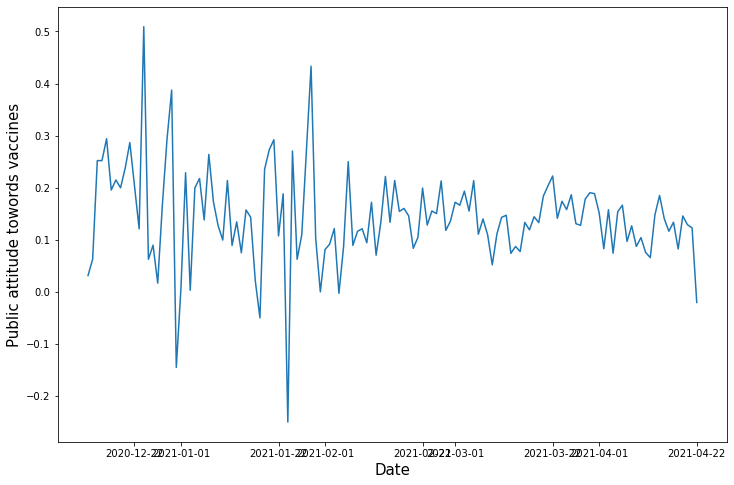

In [260]:
# Line displayed people's attitude change by time
fig = plt.figure(figsize=(12,8))
plt.plot(df_times.just_date,df_times['polarity'])
ax = plt.subplot()
ax.set_ylabel('Public attitude towords vaccines',fontsize=15)
ax.set_xlabel('Date',fontsize=15)

## Topic Modeling

In [261]:
from gensim import matutils, models
import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(df_states.total_text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00100000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0022z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝐏𝐚𝐬𝐨,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
𝗜𝗺,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
𝘃𝗮𝗰𝗰𝗶𝗻𝗮𝘁𝗲𝗱,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
𝚂𝚑𝚘𝚝,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [263]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [264]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.057*"moderna" + 0.033*"vaccine" + 0.016*"got" + 0.016*"shot" + 0.015*"dose" + 0.015*"covid19" + 0.014*"first" + 0.011*"second" + 0.009*"today" + 0.009*"vaccinated"'),
 (1,
  '0.005*"covaxin" + 0.003*"vaccine" + 0.003*"sputnikvaccine" + 0.002*"moderna" + 0.002*"sinopharm" + 0.002*"india" + 0.002*"covid19" + 0.001*"sputnikv" + 0.001*"dose" + 0.001*"got"')]

In [265]:
from nltk import word_tokenize, pos_tag
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [266]:
data_nouns_adj = pd.DataFrame(df_states.total_text.apply(nouns_adj))

In [267]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.total_text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index

In [268]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [271]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.007*"covaxin" + 0.005*"days" + 0.005*"thank" + 0.004*"thanks" + 0.004*"grateful" + 0.004*"mrna" + 0.004*"sputnikv" + 0.004*"time" + 0.004*"new" + 0.004*"week"'),
 (1,
  '0.007*"mrna" + 0.007*"code" + 0.007*"genetic" + 0.006*"life" + 0.006*"software" + 0.005*"thank" + 0.004*"tal" + 0.004*"new" + 0.004*"week" + 0.004*"days"'),
 (2,
  '0.007*"covaxin" + 0.005*"thank" + 0.004*"morning" + 0.004*"thanks" + 0.004*"days" + 0.004*"happy" + 0.004*"doses" + 0.004*"available" + 0.003*"grateful" + 0.003*"sore"')]

#### We can see that the 3 topic regaring COVID-19 vaccines are:
        1. Technology used to developed vaccines
        2. Vaccines developed by different countries
        3. Appreciation about it. 